In this project, I built a neural network (KNN) that can classify images of hand gestures (rock, paper, scissors) using the Tensorflow library. The dataset contains 2,188 images of hands in Rock, Paper, and Scissors poses. The images are 300x200 pixels in size and are in color.

In [19]:
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

Paths to the rock, paper, and scissors images folders:

In [20]:
rock_dir = './rock'
paper_dir = './paper'
scissors_dir = './scissors'

Preparing the data by using load_images_labels() function. This function takes the path to the images folder and returns a list of images and a list of labels. In this case, I'm only resizing and applying a full color map to the images.

In [21]:
def load_images_labels(folder_path, label):
    images = []
    labels = []
    for filename in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, filename))
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (30, 30))
            images.append(img)
            labels.append(label)
    return images, labels

rock_images, rock_labels = load_images_labels(rock_dir, 0)
paper_images, paper_labels = load_images_labels(paper_dir, 1)
scissors_images, scissors_labels = load_images_labels(scissors_dir, 2)

X = np.array(rock_images + paper_images + scissors_images)
y = np.array(rock_labels + paper_labels + scissors_labels)

Division into training and test sets is 80% and 20%. The training set is used to train the model, while the test set is used to evaluate the model's performance.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

Normalization of the images is done by dividing each pixel value by 255.0. This ensures that the pixel values are in the range [0,1]. It's done to make the model easier to train.

In [23]:
X_train = X_train / 255.0
X_test = X_test / 255.0

Building a KNN model:

In [24]:
model = KNeighborsClassifier(n_neighbors=100)

Training the model using the fit() function

In [25]:
history = model.fit(X_train.reshape(X_train.shape[0], -1), y_train)

Confusion matrix and accuracy score:

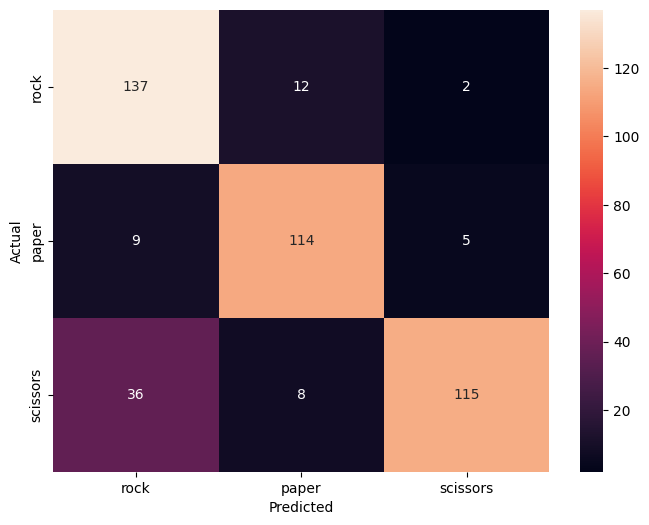

Accuracy:  83.56164383561644 %


In [26]:
labels = ['rock', 'paper', 'scissors']

y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))


cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Accuracy
print('Accuracy: ', np.sum(y_pred == y_test) / len(y_test) * 100, '%')

In [27]:
# display misclassified images
# arr = np.where(y_pred != y_test)
# for i in arr[0][:9]:
#     plt.figure(figsize=(4, 4))
#     plt.imshow(X_test[i])
#     plt.title(f"Actual: {labels[y_test[i]]}, Predicted: {labels[y_pred[i]]}")
#     plt.axis('off')
#     plt.show()
#     # save image
#     plt.savefig(f"./mis/{i}.png")

Bibliography:

- https://www.tensorflow.org/api_docs/python/tf/keras/

- https://www.kaggle.com/datasets/drgfreeman/rockpaperscissors

- https://medium.com/@sorenlind/nearest-neighbors-with-keras-and-coreml-755e76fedf36